# Project 2 - Empirical and Theoretical Probability (Hannah)

Describe a scenario that you find surpising. There are a couple examples below.

Is it actually surprising? Use empirical and theoretical probability.



## Examples

1. It's winter, and folks have the sniffles. Currently 100 out of the 283 students in the upper school have some sort of ailment. There are 15 students in your English class and every one of them is sick.

2. The U.S. population is 50.8% female. There are 23 women in the 100 person U.S. Senate. 

## Description

Describe the scenario. What are the givens? Be sure to state all assumptions you've made.

In a random survey-based study of US adults, 72 out of 104 surveyed slept with their phones within arms reach. At Bush, 18 out of 20 upper school students also slept with their phones within arms reach. 

What's the probability that a random sample of US adults would mimic the survey conducted at Bush? In other words, is it unusual for 18 out of 20 US adults to sleep with their phones within arms reach?

In this process, we are assuming that the random 20 students surveyed represent the entire Bush upper school population. It was also assumed that the data of US adults represented the entire US adult population, and that all answers in the survey were completely independent-- that is, one person's answer would not have affected anothers'.

## Simulation

1) Create an empirical probability distribution of what you would observe under the null hypothesis.

2) Calculate the empirical probability of the "unusual" event.

3) Calculate the empirical expected value and standard deviation.


In [0]:
#Importing all libraries
from datascience import *
import numpy as np

Below, I'm importing the data I'm using from Kaggle and placing it in a table. It's a random sample of 104 United States adults, 72 of which sleep with their phones within arms reach.

In [0]:
#Importing tables from kaggle
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving SleepStudyData.csv to SleepStudyData.csv
User uploaded file "SleepStudyData.csv" with length 2071 bytes


In [0]:
#imports table of US adult data
sleep_data = Table().read_table("SleepStudyData.csv")
sleep_data_phone = sleep_data.select("PhoneReach")
sleep_data_phone

PhoneReach
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
No
Yes


I gathered a random sample of 20 people from the entire 286 Upper School students at Bush by assigning each students a number between 1 and 286.
20 random numbers were drawn below, and students whose numbers were drawn they were surveyed. This data was placed in the table below.

In [0]:
#Generating 20 random numbers
numbers = np.arange(0,286)
ran_numbers = np.random.choice(numbers, 20)
#when I ran it, the array produced [12, 37, 46, 52, 89, 114, 119, 150, 151, 156, 201, 215, 225, 231, 234, 256, 263, 269, 275, 284]

In [0]:
! pip install --upgrade --quiet gspread
from google.colab import auth
import pandas as pd
auth.authenticate_user()

import gspread
from oauth2client.client import GoogleCredentials

gc = gspread.authorize(GoogleCredentials.get_application_default())
worksheet = gc.open('Traffic Dataset').sheet1

# get_all_values gives a list of rows.
sheet_rows = worksheet.get_all_values()
pd_df = pd.DataFrame.from_records(sheet_rows)
pd_df.columns = pd_df.iloc[0]
pd_df = pd_df.drop(pd_df.index[0])
happy = Table.from_df(pd_df)
happy

NameError: ignored

The following code runs a simulation of US adults. Using the probability that an adult slept with their phone within arms reach (69.2%), it calculated how many adults out of 20 exhibited this trait , then ran this 10,000 times, placing the results in a histogram.

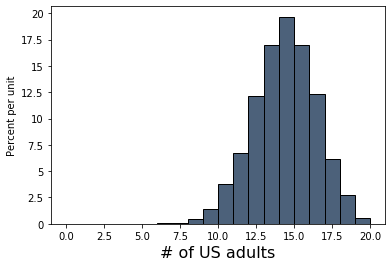

In [0]:
#Runs a simulation that counts the number of "yes" answers from adults
%matplotlib inline
def phone_near(asks):
  us_yes = 0 
  probabilities = make_array(0.692,0.308)
  for i in np.arange (asks):
    us_answer = np.random.choice(make_array("Yes", "No"), p=probabilities)
    if us_answer == "Yes":
      us_yes += 1
    elif us_answer == "No":
      us_yes += 0
  return us_yes

#runs this 10,000 times and places results in a histogram
all_us_ans = []
for i in np.arange(0, 10000):
  all_us_ans.append(phone_near(20))
us_table = Table().with_columns("# of US adults", all_us_ans)
us_table.hist("# of US adults", bins = np.arange(0,21))


Again, our question is:
In a sample of 20 US adults, is it unusual for 18 to sleep with their phones within arms reach?

Our null hypothesis is that if 69.2% (or 72 out of 104) adults in the United States sleep with their phones within arms reach, then Bush Upper School students should exhibit the same traits.

In [0]:
len(us_table.where("# of US adults", are.above_or_equal_to(18)).column("# of US adults")) / 10000

0.0327

When I ran the simulation, it calculated that there was a 3.15% chance that US adults would exhibit the same traits as students in the Bush survey. This value was our empirical probability (Note that this value changes every time the simulation is run). To calculate the empirical standard deviation, I just applied a function to the US data.

In [0]:
np.std(all_us_ans)

2.0539749535960756

To calculate empirical expected value, we can just find the average number of US adults who replied "yes":

In [0]:
np.average(all_us_ans)

13.8633

So in my simluation, the expected value would be that 14 out of 20 US adults sleep near their phones.

## Theoretical Probability

1) Create a theoretical probability distribution of what you would observe under the null hypothesis.

2) Calculate the theoretical probability of the "unusual" event.

3) Calculate the theoretical expected value and standard deviation.

Null hypothesis: if 69.2% of adults in the United States sleep with their phones within arms reach, then an equal percentage of Bush upper school students should too.

"Unusual" event: 90% of Bush School Students sleep with their phones within arms reach.

The distribution of US adults is binomial:
*   There is a set number of 20 people surveyed (n = 20 trials)
*   There is a success/fail ("Yes" and "No")
*   We are assuming independece

Therefore, we can calculate the theoretical probability of getting 18 or more "Yes" answers from US adults. 

The US data states that
Pr(Yes) = 0.692

To find this, we should add the probability of 18,19, and 20 "yes" answers (we can do this because the three values are mutually exclusive, meaning a survey can't have 18 and 19 yeses at the same time).

To find Pr(Yes >= 18):

Pr(Yes=18) = (20C18)(0.692^18)(0.308^2) = 0.0238

Pr(Yes=19) = (20C19)(0.692^19)(0.308) = 0.0056

Pr(Yes=20) = (20C20)(0.692^20) = 0.000634

Pr(Yes >= 18) = 0.0238 + 0.0056 + 0.000634 = 0.30034 %

Out of an infinite number of trials, 3.0% have 18 or more adults sleeping with their phones within arms reach.




The probability of a US adult sleeping with their phone within arms reach is 69.2%. 

The expected value in this experiment would be that, in a group of 20 US adults, 69.2% of those 20 would exhibit this trait. Therefore, the theoretical expected value would be 0.692*20 = 13.84 (rounded up to 14) US adults sleeping with their phone within arms reach in each sample of 20.


theoretical standard deviation =  square root of (number of trials * probability of success)(1 - probability of success)

standard deviation = square root of (20*0.692)(1-0.692)

standard deviation = 2.064

## Conclusions

What did we learn?
Write paragraph that describes your observation and what interested you about that occurence. State the assumptions you made in designing your simulation and calculating probabilities. State the probability of your observation with the assumptions you made and whether you think it is unusual. If your observation was unusual, can you generalize that to make a conclusion about a population or system?



I chose this topic because of the survey I saw on Kaggle. It stated that 72 out of 104, or 69.2%, of US adults slept with their phone within arms reach. I began asking students around me whether they did the same, and most of them did. I was interested to see whether Bush exhibited different or unusual results compared to US adults. I decided to conduct a survey of 20 random students form the Upper School. To ensure that this sample was random, I assigned the 286 students in the upper school an integer from 1 to 286, then used a random choice function to draw 20 random numbers from this pile. These 20 numbers correlated to 20 students, who I surveyed to collect my data. 18 out of the 20 students replied "Yes" when asked whether they slept with their phones within arms reach. I wanted to find out the probability of 18 or more US adults also doing this, and whether that occurence was unusual.

I ran a simulation that determined the number of "Yes" answers among 20 US adults, repeating this 10,000 times and putting the results in a histogram. To do so, I assumed that the 104 US adults in the Sleep Study survey represented a random sample of the United States, and that their answers were completely independent from each other. 

It was determined that the probability of 18 or more US adults replying "Yes" was 3.15% (this number varied each time I ran the simultion), which was similar to my expected theoretical probability. Because this number was so small, and vaired signifigantly from the null hypothesis, it was clear that my survey's occurence was unusual. 

However, this resolution cannot be applied to the general populations of Bush Upper School students and US adults. We can't nessesarily say that more Bush Upper School students exhibit this trait than US adults because we only had a small portion of the Bush School data avaliable to us. One of my assumptions, as stated above, was that the 20 students surveyed represented the entire Bush upper school population. However, I decided that the Bush survey, because it only represented a small fraction of the upper school(20 out of 286 people), couldn't be generalized to the entire population. Though my survey determined that 18 out of 20 students at Bush Upper school slept with their phones within arms reach, there was most likely variability in this assumption (18 out of 20 students could have been an unusual occurence). To account for this, I ran another simulation to determine how different the generalized Bush upper school data was from the US adults data, while accounting for proposed variation in the Bush data.

This simulation determined the number of "Yes" answers in 20 students at Bush, ran this 10,000 times, and placed the values in a histogram. I overlaid this histogram with that of the US adults because I wanted to see whether there was a signifigant overlap between the two. 

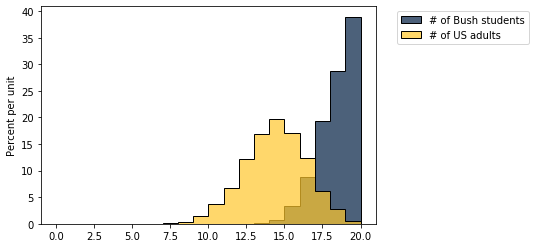

In [0]:
#Runs a simulation that counts the number of "yes" answers from Bush school students
%matplotlib inline
def phone_near(asks):
  b_yes = 0 
  probabilities = make_array(0.90,0.1)
  for i in np.arange (asks):
    b_answer = np.random.choice(make_array("Yes", "No"), p=probabilities)
    if b_answer == "Yes":
      b_yes += 1
    elif b_answer == "No":
      b_yes += 0
  return b_yes

#runs this 10,000 times and places results in an array
all_bush_ans = []
for i in np.arange(0, 10000):
  all_bush_ans.append(phone_near(20))

#Overlaying Graphs
both_data_table = Table().with_columns("# of Bush students", all_bush_ans, "# of US adults", all_us_ans )
both_data_table.hist(["# of Bush students", "# of US adults"], bins = np.arange(0,21))

The graph above depicts the overlap between the Sleep Study data and the simulated Bush data. I assumed just by looking at the graph that, because of the small overlap between the two histograms, the number of Bush students sleeping near their phones was generally higher than US adults. 

However, it would be even easier to come to this conclusion if I calculated the differences between the two simulations. If the resulting US adults data was subtracted from the Bush data, my assumption states that the difference would normally be positive, because the Bush data was usually higher than the US data. This was done below and placed into a histogram.

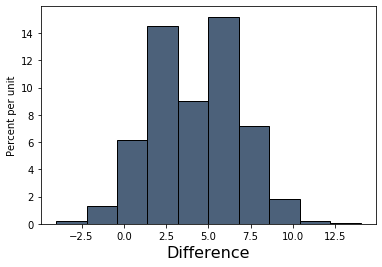

In [0]:
differences = np.asarray(all_bush_ans) - np.asarray(all_us_ans)
difference_table = Table().with_column("Difference", differences)
difference_table.hist("Difference")

As can be seen by the graph, the Bush school data was generally higher than the US adults data. However, there were slight exceptions to my hypothesis: negative differences, or differences less than or equal to zero, meant there were occurences where the Bush data was lower than the adult data. I wanted to know how common these exceptions were, or the percentage of all the data that they made up. To do so, I determined the number of "exceptions" (negative differences) and divided them by the number of trials, or 10,000.


In [0]:
exceptions_percentage = len(difference_table.where("Difference", are.below_or_equal_to(0)).column("Difference"))/10000
exceptions_percentage

0.0685

In my simluation, exceptions made up about 6.99% of all the data; which is a pretty small amount. 


Because exceptions made up a small amount of all the data, I could determine that, generally, more Bush students slept near their phones than US adults.



Feedback: 24/25
Your problem statement was clear and easy to follow. You chose an engaging and reasonable question. Your codefor the sampling distribution was neat and succinct. While the theoretical probability was correct, you lost track of a few decimals in the probability caclulations (-1). Your conclusions provided an excellent extension for how one might see this problem differently. Very nice work. 